<a href="https://colab.research.google.com/github/osh9149/2021_AI_Dataliteracy/blob/main/%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

구글 드라이브 마운트

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
!apt -qq -y install fonts-nanum*


The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 40 not upgraded.
Need to get 37.0 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 148492 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up

In [24]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

In [25]:
!pip install WordCloud
!pip install konlpy

In [26]:
#wordcloud: 파이썬에선 word cloud 모듈을 제공한다.(pypi.org/project/wordcloud/)
#konlpy : 모듈을 통해 형태소를 분석할 수 있다.(사용법은 https://konlpy.org/en/latest/에서 확인할 수 있다.)
#collentions: 컨테이너에 동일한 값의 자료가 몇 개인지를 파악하는 데 사용하는 모듈. (docs.python.org 참고)

import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import nltk 
from konlpy.tag import Kkma
from konlpy.tag import Twitter
from wordcloud import WordCloud



In [27]:
from konlpy.tag import Okt
okt=Okt()
token=okt.morphs('아빠가 방에 들어가신다')
print(token)

['아빠', '가', '방', '에', '들어가신다']


In [28]:
token=okt.morphs('아빠 가방에 들어가신다')
print(token)

['아빠', '가방', '에', '들어가신다']


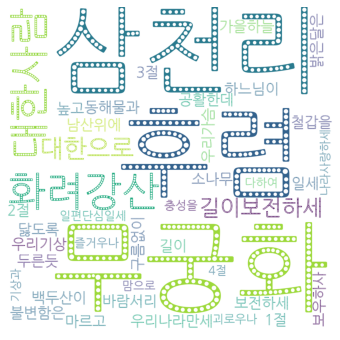

In [29]:

text = open('애국가.txt').read()
# print(text)
# font='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'

wc = WordCloud(font_path=font,
		background_color="white", 
		width=1000, 
		height=1000, 
		max_words=100, 
		max_font_size=300)

wc.generate(text)


plt.figure(figsize=(6,6))
# plt.imshow(wc, interpolation='bilinear')
plt.imshow(wc)
plt.axis('off')
plt.show()

웹스크래핑

In [43]:
from bs4 import BeautifulSoup 
import urllib.request as req

# 뒤의 인코딩 부분은 "저자:윤동주"라는 의미입니다.
# 따로 입력하지 말고 위키 문헌 홈페이지에 들어간 뒤에 주소를 복사해서 사용하세요.
url = "https://ko.wikisource.org/wiki/%EC%A0%80%EC%9E%90:%EA%B9%80%EC%9C%A0%EC%A0%95"
res = req.urlopen(url)
soup = BeautifulSoup(res, "html.parser")

# #mw-content-text 바로 아래에 있는 
# ul 태그 바로 아래에 있는
# li 태그 아래에 있는
# a 태그를 모두 선택합니다.
a_list = soup.select("#mw-content-text > div > ul > li a")
print(a_list)
for a in a_list:
    name = a.string
    print("-", name)

[<a href="/wiki/%EC%82%B0%EA%B3%A8_%EB%82%98%EA%B7%B8%EB%84%A4" title="산골 나그네">산골 나그네</a>, <a href="/wiki/%EB%96%A1" title="떡">떡</a>, <a href="/wiki/%EC%B4%9D%EA%B0%81%EA%B3%BC_%EB%A7%B9%EA%BD%81%EC%9D%B4" title="총각과 맹꽁이">총각과 맹꽁이</a>, <a href="/wiki/%EC%86%8C%EB%82%99%EB%B9%84" title="소낙비">소낙비</a>, <a href="/wiki/%EA%B8%88_%EB%94%B0%EB%8A%94_%EC%BD%A9%EB%B0%AD" title="금 따는 콩밭">금 따는 콩밭</a>, <a href="/wiki/%EB%85%B8%EB%8B%A4%EC%A7%80" title="노다지">노다지</a>, <a href="/wiki/%EA%B8%88" title="금">금</a>, <a href="/wiki/%EC%82%B0%EA%B3%A8" title="산골">산골</a>, <a href="/wiki/%EB%A7%8C%EB%AC%B4%EB%B0%A9" title="만무방">만무방</a>, <a href="/wiki/%EC%86%A5" title="솥">솥</a>, <a href="/wiki/%EC%86%A5" title="솥">솟</a>, <a href="/wiki/%EB%B4%84%EB%B4%84" title="봄봄">봄봄</a>, <a href="/wiki/%EC%95%84%EB%82%B4" title="아내">아내</a>, <a href="/wiki/%EC%95%84%EB%82%B4" title="아내">안해</a>, <a href="/wiki/%EC%8B%AC%EC%B2%AD" title="심청">심청</a>, <a href="/wiki/%EB%B4%84%EA%B3%BC_%EB%94%B0%EB%9D%BC%EC%A7%80" title="봄과 따라지">

In [30]:
date='20210913' 
#일자는 변경해 주면 되며, 코드 상 3월24일의 네이버 뉴스 랭킹의 기사제목을 뽑아온다.
news_url = 'https://news.naver.com/main/ranking/popularDay.nhn?date={}'.format(date)

headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'}
req = requests.get(news_url, headers = headers)
#  headers = headers 왜 안되지? 라고 생각하면서 계속 구글링을 해보니 네이버에서 막은것
# 일명 안티 크롤링

soup = BeautifulSoup(req.text, 'html.parser')
news_titles = soup.select('.rankingnews_box > ul > li > div > a')

crowled_title = []
for i in range(len(news_titles)):
    crowled_title.append(news_titles[i].text)
    print(i+1, news_titles[i].text) # 기사 제목 리스트 저장하기

1 화이자 1차접종 20대男, 5일 뒤 방에서 숨진 채 발견됐다
2 [단독]조성은 "내 폰서 4월 고발장 기록 나와…보낸이 손준성"
3 "10만원 결제할테니 9만원 주세요"…재난지원금 '깡' 또 활개
4 제주 관광객의 비극…호텔 주차장서 7m 아래로 추락해 사망
5 30대女 살해·유기 부인하던 60대, 전주교도소서 극단적 선택
6 [가족] "나 좀 데려가세요" 도살장에서 사람 품에 쏙 안긴 강아지
7 "타워 타고 싶으면 돈 내" 순번 빌미로 룸살롱까지 요구하는 노조
8 조성은의 "치자" 발언 두고 뉴스버스 "보도 순수성 훼손...대응 강구"
9 제보자 조성은 "문건 보낸 손준성과 검사 손준성은 같은 사람 확인"
10 野, 조성은 '원장님 원한 날짜' 발언에 "박지원 개입 자백... 경질해야"
11 깊은밤 골목길에서 남녀가 거래한 것은?
12 영국 “봉쇄도 백신여권도 필요없다”
13 마포구 식당 주인의 안타까운 죽음…“코로나19로 매출 타격”
14 14호 태풍 찬투 17일 오전 남해 앞바다로 북상 예상
15 “유포할까요 지금?”…60대 이상 ‘몸캠 피싱’ 2년 새 5배
16 “男 청소년, 코로나 입원보다 화이자 부작용 확률 높아”
17 현금 2억과 수상한 편지…직장 동료의 끔찍한 결말
18 “내게 추미애란? 文만 보면”…‘집사부일체’ 나온 윤석열
19 원로배우 윤양하 별세…유도회 부회장 지낸 검객물 스타
20 “100원 택시는 신의 선물” NYT 극찬에…서천군수 “어르신들 덕”
21 ‘코로나 백신’ 기술로 암세포까지 죽인다
22 790g 초미숙아, 그게 끝 아니었지만…엄마 위로하듯 “미안해”
23 ‘반격’ 윤석열, 박지원·조성은 고발…“동석자 1명 더 있다”
24 조성은 “박지원과 윤석열 관련 상의하지 않았다” 반발
25 D.P. 김보통 작가가 “군대, 지금은 좋아졌다”는 분들에게
26 윤석열측, 박지원·조성은 고발…"8월 만남에 성명불상자 1인도 동석"
27 완주 30대 여성 살해·유기 혐의 60대…유서 남긴 뒤 극단 선택(종합)
28 카카오株, 공정위 김범수

In [31]:
title = "".join(crowled_title)

filtered_title = title.replace('.', ' ').replace('"',' ').replace(',',' ').replace("'"," ").replace('·', ' ').replace('=',' ').replace('\n',' ')

filtered_title

'화이자 1차접종 20대男  5일 뒤 방에서 숨진 채 발견됐다[단독]조성은  내 폰서 4월 고발장 기록 나와…보낸이 손준성  10만원 결제할테니 9만원 주세요 …재난지원금  깡  또 활개제주 관광객의 비극…호텔 주차장서 7m 아래로 추락해 사망30대女 살해 유기 부인하던 60대  전주교도소서 극단적 선택[가족]  나 좀 데려가세요  도살장에서 사람 품에 쏙 안긴 강아지 타워 타고 싶으면 돈 내  순번 빌미로 룸살롱까지 요구하는 노조조성은의  치자  발언 두고 뉴스버스  보도 순수성 훼손   대응 강구 제보자 조성은  문건 보낸 손준성과 검사 손준성은 같은 사람 확인 野  조성은  원장님 원한 날짜  발언에  박지원 개입 자백    경질해야 깊은밤 골목길에서 남녀가 거래한 것은?영국 “봉쇄도 백신여권도 필요없다”마포구 식당 주인의 안타까운 죽음…“코로나19로 매출 타격”14호 태풍 찬투 17일 오전 남해 앞바다로 북상 예상“유포할까요 지금?”…60대 이상 ‘몸캠 피싱’ 2년 새 5배“男 청소년  코로나 입원보다 화이자 부작용 확률 높아”현금 2억과 수상한 편지…직장 동료의 끔찍한 결말“내게 추미애란? 文만 보면”…‘집사부일체’ 나온 윤석열원로배우 윤양하 별세…유도회 부회장 지낸 검객물 스타“100원 택시는 신의 선물” NYT 극찬에…서천군수 “어르신들 덕”‘코로나 백신’ 기술로 암세포까지 죽인다790g 초미숙아  그게 끝 아니었지만…엄마 위로하듯 “미안해”‘반격’ 윤석열  박지원 조성은 고발…“동석자 1명 더 있다”조성은 “박지원과 윤석열 관련 상의하지 않았다” 반발D P  김보통 작가가 “군대  지금은 좋아졌다”는 분들에게윤석열측  박지원 조성은 고발… 8월 만남에 성명불상자 1인도 동석 완주 30대 여성 살해 유기 혐의 60대…유서 남긴 뒤 극단 선택(종합)카카오株  공정위 김범수 의장 조사 소식에 동반 하락이재명 27 8% 윤석열 26 4%  2강 …홍준표 16 4% 이낙연 16 3%  2중 김재원  조성은  세금연체 임금체불에도 고급주택 마세라티…뭔가 느

In [32]:
tw = Twitter() # Twitter가 Okt로 변경

tokens_ko = tw.nouns(filtered_title)

tokens_ko

ko = nltk.Text(tokens_ko, name='기사 내 명사')

ko.tokens

ko.vocab()

new_ko=[]
for word in ko:
  if len(word) > 1 and word != '단독' and  word != ' ':
        new_ko.append(word)

new_ko

ko = nltk.Text(new_ko, name = '기사 내 명사 두 번째')

ko.tokens

ko.vocab()

data = ko.vocab().most_common(150)

data = dict(data)

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [33]:
data

{'가족': 4,
 '강력': 5,
 '거래': 3,
 '검토': 3,
 '게시': 3,
 '게임': 3,
 '경찰': 6,
 '고발': 7,
 '공약': 3,
 '공정위': 5,
 '관련': 3,
 '교도소': 6,
 '구도': 3,
 '국내': 3,
 '국민': 4,
 '국민대': 3,
 '규제': 3,
 '극단': 8,
 '금지': 3,
 '김건희': 3,
 '김범수': 6,
 '김부선': 3,
 '날짜': 8,
 '남성': 5,
 '낭비': 3,
 '노엘': 3,
 '노인': 3,
 '논란': 9,
 '누구': 4,
 '누락': 3,
 '다시': 3,
 '담배': 3,
 '대상자': 3,
 '대선': 8,
 '대출': 4,
 '득표': 3,
 '말꼬리': 3,
 '몸캠': 3,
 '박지원': 18,
 '반격': 3,
 '발견': 5,
 '발사': 5,
 '발언': 6,
 '백신': 9,
 '보도': 6,
 '보수': 3,
 '본격': 3,
 '부작용': 3,
 '북상': 6,
 '분석': 3,
 '비트코인': 3,
 '사과': 4,
 '사람': 5,
 '사망': 8,
 '사장': 3,
 '사주': 4,
 '살해': 8,
 '상의': 3,
 '상하이': 4,
 '선택': 9,
 '세금': 6,
 '셋값': 3,
 '속보': 4,
 '손님': 3,
 '손준': 9,
 '수도권': 5,
 '수사': 4,
 '순항미사일': 5,
 '시험': 4,
 '신고': 5,
 '신규': 4,
 '신청': 4,
 '신형': 4,
 '아래': 3,
 '아이': 4,
 '아이폰': 7,
 '아파트': 6,
 '아프간': 3,
 '애플': 4,
 '여경': 4,
 '여성': 12,
 '연습': 4,
 '영상': 4,
 '오늘': 5,
 '우려': 4,
 '원금': 10,
 '원장': 9,
 '원한': 4,
 '월급': 3,
 '위험': 4,
 '유기': 4,
 '유서': 4,
 '육박': 3,
 '윤석열': 18,
 '의장': 4,
 '의혹': 7,
 '이낙연': 12,
 '이

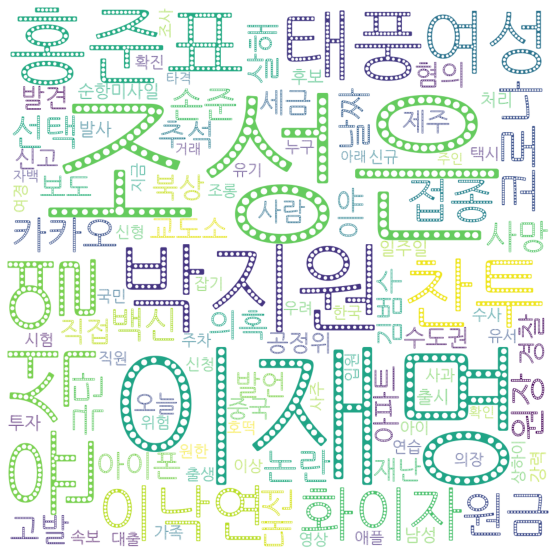

In [34]:
wordcloud = WordCloud().generate(filtered_title)

# font='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'

wc = WordCloud(font_path=font,
		background_color="white", 
		width=1000, 
		height=1000, 
		max_words=100, 
		max_font_size=300)

wc = wc.generate_from_frequencies(data)

plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

특정모양으로 만들기

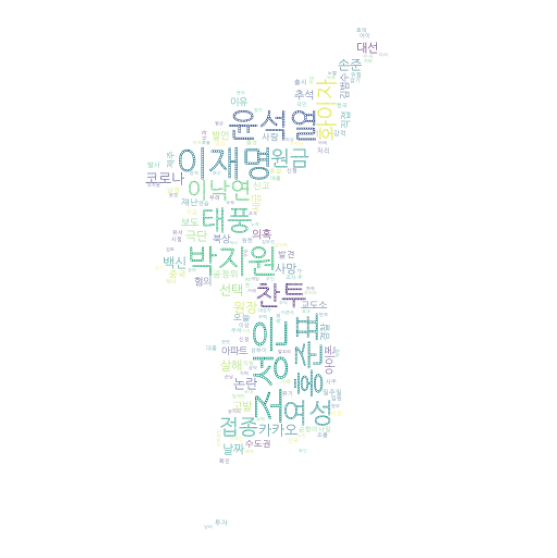

In [39]:
## SET MASK IMAGES
import numpy as np
from PIL import Image

# mask = Image.open('mask.png')
# mask = np.array(mask)
mask = np.array(Image.open('mask.png'))


wc = WordCloud(font_path=font,
    background_color='white',
    mask=mask,
    width=1000,
    height=1500
    )
wc = wc.generate_from_frequencies(data)
wc.to_file(filename='/content/drive/My Drive/Colab Notebooks/wordcloud_image1.png') # to_file 함수

plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

색상변경하기

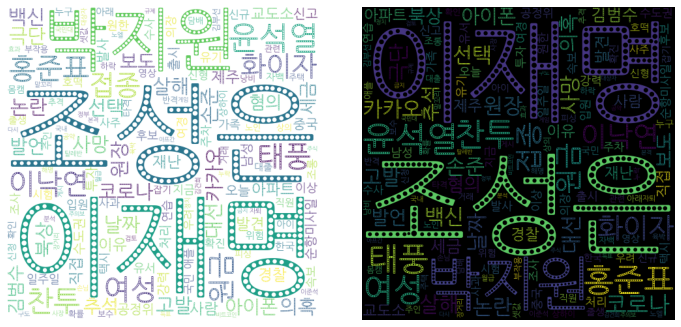

In [40]:
white_wordcloud = WordCloud(font_path=font,
                      width=480, height=480,
                      background_color='white').generate(' '.join(data))

black_wordcloud = WordCloud(font_path=font,
                      width=480, height=480,
                      background_color='black').generate(' '.join(data))


fig,ax = plt.subplots(1,2, figsize=(10,5))

fig.tight_layout()

ax[0].axis('off')
ax[0].imshow(white_wordcloud)

ax[1].axis('off')
ax[1].imshow(black_wordcloud)

Seaborn Palette 사용

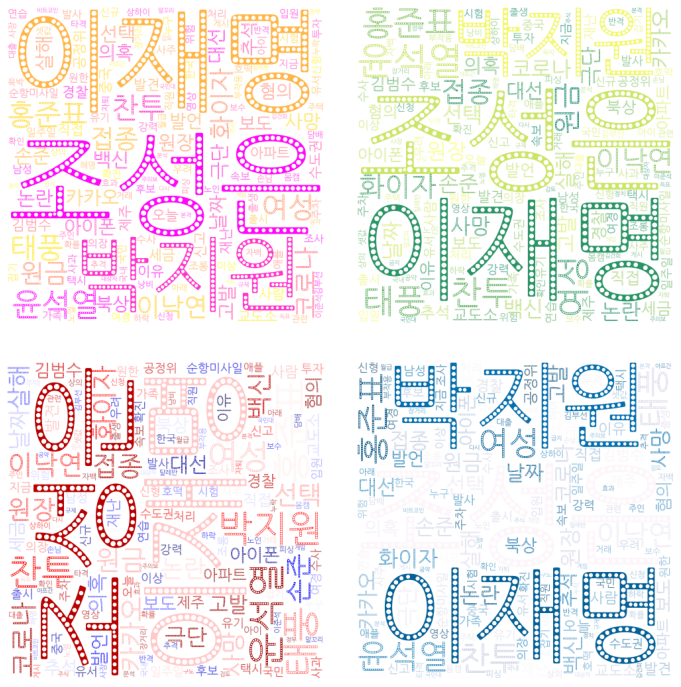

In [42]:
#sns.color_palette에 대해 검색
#seaborn.pydata.org/generated/seaborn.color_palette.html 이 사이트에 들어가시면 더 다양한 palette를 찾으실 수 있음

palettes = ['spring', 'summer', 'seismic','PuBu']
fig,ax = plt.subplots(2,2,figsize=(10,10))
fig.tight_layout()
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
plt.subplots_adjust(wspace=0.1, 
                    hspace=0.1)

for i in range(4):
    wordcloud = WordCloud(font_path=font,
                      background_color = 'white',
                      width = 480, height=480,
                      colormap = palettes[i]).generate(' '.join(data))
    axes[i].axis('off')
    axes[i].imshow(wordcloud)

Customize, 원하는 색으로 꾸미기

In [ ]:
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(239,313),np.random.randint(26,32),np.random.randint(45,80)))

step1. 원하는 색 고르기
이런 모양의 함수로, hsl 괄호 안에 세 개의 정수값이 들어가서 칼라를 정하게 됩니다.

첫번째 숫자를 0으로 고정시키면, 링크에 있는 것처럼  무채색의 워드 클라우드가 됩니다.

LOLCOLORS라는 사이트에서 이 두개의 색 조합으로 워드클라우드를 꾸며보세요

첫번째 색은 #AAABD3, 두번째 색은 #CBA6C3 입니다.

step2. HSL 좌표 얻고, 원하는 범위 정하기
이 색들의 값을 www.w3schools.com/colors/colors_picker.asp 이 사이트에 검색하면 hsl 좌표를 알 수 있다.

#AAABD3 = hsl(239, 32%, 75%),   #CBA6C3 =hsl(313, 26%, 72%) 이 나오네요.

이 두 값 좌표 사이에서 움직이도록 color_func을 조절해주면 됩니다.

첫번째랑 마지막 좌표만 random 범위를 조절해줘도 다채로운 그래프를 그릴 수 있습니다!

마지막 좌표는 값이 작을수록 흰색에 가까워지고, 커질수록 검정색에 가까워져서, 원하는 비율을 맞추면 될 것 같습니다.

step3. 함수 적용시키기.

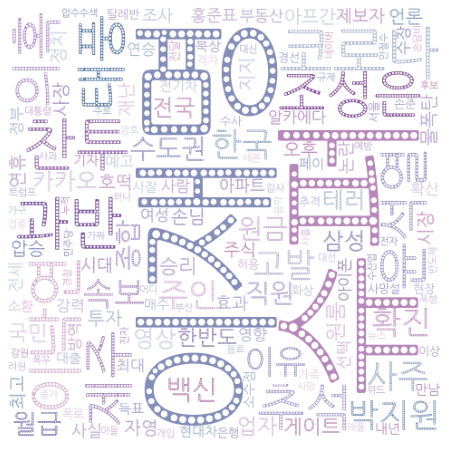

In [ ]:
lightwordcloud = WordCloud(background_color='white', 
                      width=480, height=480, 
                      font_path=font,
                     color_func = color_func).generate(' '.join(data))

plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(lightwordcloud)

다음 그림은 첫번째 좌표는 239 ~ 313, 두번째 좌표는 26 ~ 32로 고정해 둔 상태에서, 

세번째 좌표를 10 ~ 30, 45 ~ 80, 70 ~ 90 사이에서 나오도록 
Word cloud를 변경해서 그려보세요